# Finding app events per timeunit
The purpose of this notebook is to find meaningful features based on the type of apps active on devices in the evening, night, morning and afternoon.

I would expect that people of working age have bigger difference in app usage during the day and in the evening/night.

It only makes sense to look at apps that are active. I do not expect apps to be installed/uninstalled to change during the day.

Challenge is that only for some devices events during all four periods are measured and that the number of events differs strongly per period of the day.

So we could first look at any differences between the four periods.

More specifically:
- are specifi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dir_in = './data/events_per_timeunit/'

## Comparison day/evening
Load all previously aggregated data.

In [136]:
# Load data and make timestamp is a datetime type
df1 = pd.read_csv(dir_in + 'app_cat_per_device_active_night.csv', index_col='device_id')
df2 = pd.read_csv(dir_in + 'app_cat_per_device_active_morning.csv', index_col='device_id')
df3 = pd.read_csv(dir_in + 'app_cat_per_device_active_afternoon.csv', index_col='device_id')
df4 = pd.read_csv(dir_in + 'app_cat_per_device_active_evening.csv', index_col='device_id')
day = df2.add(df3, fill_value=0)
night = df4.add(df1, fill_value=0)
diff = day.sub(night, fill_value=0)

In [137]:
# Load genders and merge sets
train = pd.read_csv('./data_ori/' + 'gender_age_train.csv', index_col='device_id')
def age_group(sex, age):
    # Convert age column to age group
    #ageGroupsF = ['23-','24-26','27-28','29-32','33-42,''43+']
    #ageGroupsM = ['22-','23-26','27-28','29-31','32-38,''39+']

    if sex not in ['M','F']:
        ValueError('%s is not a valid gender' % sex)
        
    if age not in range(100):
        ValueError('%s is not a valid age' % age)
    
    if sex=="M":
        if age<=22:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=31:
            g = 3
        elif age<=38:
            g = 4
        else:
            g = 5
    elif sex=="F":
        if age<=23:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=32:
            g = 3
        elif age<=42:
            g = 4
        else:
            g = 5
    
    return g
train['age_group'] = train[['gender','age']].apply(lambda x: age_group(x[0],x[1]), axis=1)
train.drop(['age','group'], axis=1, inplace=True)

In [138]:
df1.index.nunique()

26808

In [139]:
df1 = df1.merge(train, how='left', left_index=True, right_index=True)

In [140]:
df1.index.nunique()

26808

In [141]:
diff = train.merge(diff, how='inner', left_index=True, right_index=True)

In [142]:
sum_gender = diff.groupby('gender').mean()
sum_gender.head()

,age_group,is_installed,is_active,1 free,1 reputation,1 vitality,3 kindom game,80s Japanese comic,90s Japanese comic,A beauty care,...,travel,tribe,trickery,unknown,video,violence comic,vitality,war chess,weibo,zombies game
gender,,,,,,,,,,,,,,,,,,,,,
F,2.65225,32.956001,32.956001,0.889443,0.053970,0.034900,0.001745,0.000748,0.000374,0.004736,...,0.149819,-0.000125,0.0,2.482612,0.565624,0.000125,-0.000125,0.000499,0.246915,0.000125
M,2.78396,33.115738,33.115738,0.704940,0.049527,0.050184,0.003219,0.000066,0.000723,0.004861,...,0.149961,-0.000131,0.0,2.206582,0.441474,-0.000066,0.001248,0.000525,0.193248,0.001379


In [146]:
(sum_gender.loc['F']/sum_gender.loc['M']).sort_values(ascending=False).head(20)

quality                           inf
Share Tour                        inf
Travel preferences                inf
Simple                            inf
Engineering Drawing               inf
noble                             inf
Desktop Enhancements              inf
Table Games                       inf
Mother                      36.053347
Sports News                 23.719307
game-tank                   13.282812
App Store                   12.650297
80s Japanese comic          11.385267
game-Cutting things         10.436495
children books               8.132334
lose weight                  7.115792
Casual puzzle categories     7.048023
natural                      5.692634
Parenting                    5.421556
fashion outfit               5.304500
dtype: float64

In [159]:
sum_age = diff.groupby('age_group').mean()
sum_age = np.log(sum_age+1)
sum_age.head()

,is_installed,is_active,1 free,1 reputation,1 vitality,3 kindom game,80s Japanese comic,90s Japanese comic,A beauty care,A shares,...,travel,tribe,trickery,unknown,video,violence comic,vitality,war chess,weibo,zombies game
age_group,,,,,,,,,,,,,,,,,,,,,
0,3.007594,3.007594,0.499659,0.024244,0.020945,0.000000,0.000613,0.000307,0.001226,0.030809,...,0.076734,0.001533,0.0,0.933564,0.349749,0.000307,-0.000307,0.000000,0.251212,0.000920
1,3.229105,3.229105,0.524216,0.034013,0.035003,0.005622,0.000512,0.000000,0.005622,0.065707,...,0.093865,-0.000513,0.0,1.076762,0.341621,0.000512,0.000769,0.001792,0.177526,0.002048
2,3.348244,3.348244,0.544363,0.047469,0.053967,0.001897,0.000000,0.000759,0.000759,0.118416,...,0.115713,0.001897,0.0,1.123987,0.378650,-0.000380,0.000000,0.000000,0.216054,-0.001901
3,3.488262,3.488262,0.550137,0.052030,0.033630,0.000789,0.000526,0.000000,0.004986,0.113535,...,0.154940,0.000000,0.0,1.214572,0.414457,0.000000,0.000789,0.000263,0.177443,0.001315
4,3.722735,3.722735,0.606945,0.055920,0.052435,0.003673,0.000194,0.001355,0.006370,0.183160,...,0.165921,0.000194,0.0,1.273841,0.393256,-0.000387,0.000968,0.000194,0.163951,0.002321


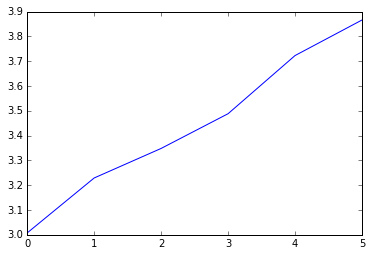

In [160]:
plt.plot(sum_age.index, sum_age.is_installed)

In [164]:
(sum_age.loc[4] - sum_age.loc[0]).sort_values(ascending=True).head(50)

Consumer Finance             -0.122600
weibo                        -0.087261
Trendy / cool 1              -0.069579
pictures photography         -0.029984
music                        -0.026956
College Students             -0.024032
Occupational identity        -0.022870
File Editor                  -0.022358
game-Tactics                 -0.021672
Customized 1                 -0.021047
class managemetn             -0.015671
game-Puzzle                  -0.014557
fashion outfit               -0.013275
Sports News                  -0.013271
blogs                        -0.011752
Animation aggregate class    -0.011724
Animation                    -0.011498
free                         -0.010545
sports                       -0.009695
SLG (strategy)               -0.007971
professional skills          -0.006980
realistic style comic        -0.006443
Points Activities            -0.005509
game-Parkour                 -0.005377
coupon                       -0.005371
Shootout Shooting (STG)  

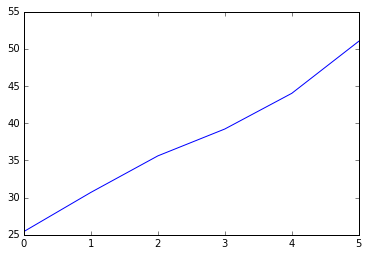

In [169]:
plt.plot(sum_age.index, sum_age[sum_age.columns[2:]].sum(axis=1))

In [170]:
diff.head()

,gender,age_group,is_installed,is_active,1 free,1 reputation,1 vitality,3 kindom game,80s Japanese comic,90s Japanese comic,...,travel,tribe,trickery,unknown,video,violence comic,vitality,war chess,weibo,zombies game
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,M,4,318.0,318.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221026417907250887,F,3,186.0,186.0,3.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0
-9220830859283101130,M,0,-31.0,-31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
-9220061629197656378,M,5,36.0,36.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9218960997324667698,F,5,-18.0,-18.0,-3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0


In [171]:
diff['sum_diff'] = diff[diff.columns[2:]].sum(axis=1)

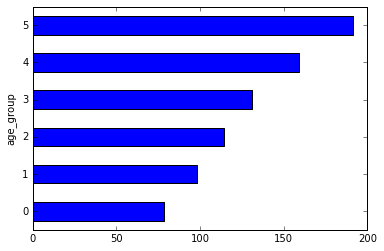

In [182]:
diff.groupby('age_group').sum_diff.mean().plot(kind='barh')

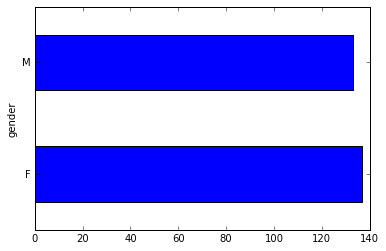

In [183]:
diff.groupby('gender').sum_diff.mean().plot(kind='barh')

## Comparison weekend/weekdays

In [185]:
# Load data and make timestamp is a datetime type
df1 = pd.read_csv(dir_in + 'app_cat_per_device_active_weekdays.csv', index_col='device_id')
df2 = pd.read_csv(dir_in + 'app_cat_per_device_active_weekends.csv', index_col='device_id')
diff = df1.sub(df2, fill_value=0)

In [186]:
diff.head()

,is_installed,is_active,app_cat_sa_1 free,app_cat_sa_1 reputation,app_cat_sa_1 vitality,app_cat_sa_3 kindom game,app_cat_sa_80s Japanese comic,app_cat_sa_90s Japanese comic,app_cat_sa_A beauty care,app_cat_sa_A shares,...,app_cat_sa_travel,app_cat_sa_tribe,app_cat_sa_trickery,app_cat_sa_unknown,app_cat_sa_video,app_cat_sa_violence comic,app_cat_sa_vitality,app_cat_sa_war chess,app_cat_sa_weibo,app_cat_sa_zombies game
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,-126.0,-126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
-9222661944218806987,14.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
-9222399302879214035,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221825537663503111,122.0,122.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
-9221767098072603291,35.0,35.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0


In [187]:
diff = train.merge(diff, how='inner', left_index=True, right_index=True)

In [188]:
diff.head()

,gender,age_group,is_installed,is_active,app_cat_sa_1 free,app_cat_sa_1 reputation,app_cat_sa_1 vitality,app_cat_sa_3 kindom game,app_cat_sa_80s Japanese comic,app_cat_sa_90s Japanese comic,...,app_cat_sa_travel,app_cat_sa_tribe,app_cat_sa_trickery,app_cat_sa_unknown,app_cat_sa_video,app_cat_sa_violence comic,app_cat_sa_vitality,app_cat_sa_war chess,app_cat_sa_weibo,app_cat_sa_zombies game
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,M,4,-126.0,-126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
-9221026417907250887,F,3,172.0,172.0,3.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0
-9220830859283101130,M,0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
-9220061629197656378,M,5,44.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9218960997324667698,F,5,8.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0


In [190]:
diff['sum_diff'] = diff[diff.columns[2:]].sum(axis=1)
print diff['sum_diff'].head()

device_id
-9222956879900151005    -704.0
-9221026417907250887    1254.0
-9220830859283101130     118.0
-9220061629197656378     244.0
-9218960997324667698     286.0
Name: sum_diff, dtype: float64


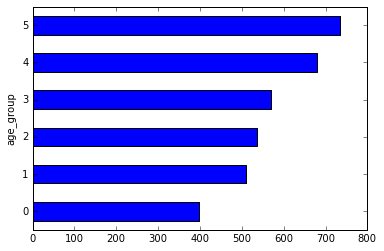

In [191]:
diff.groupby('age_group').sum_diff.mean().plot(kind='barh')

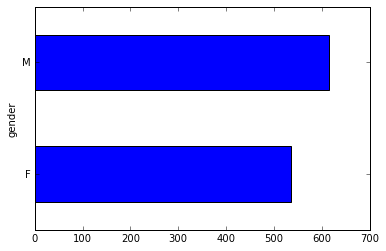

In [192]:
diff.groupby('gender').sum_diff.mean().plot(kind='barh')